In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

###Linear Regression

1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [3]:
data_x,data_y = np.loadtxt('linear.txt')

2) Plot `data_x` vs `data_y`

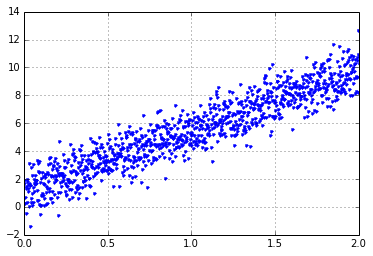

In [7]:
plt.plot(data_x,data_y,'.')
plt.grid()

3) What what is the equation for a striaght line?

In [11]:
print "y=ax+b"

y=ax+b


4) What is the difference between a "good line" and a "bad line"?

In [10]:
print "A good line has the least distance from all the points, as compared to a bad line."

A good line has the least distance from all the points, as compared to a bad line.


5) What are we trying to adjust to minimize the $\chi^2$?

In [13]:
print "We are adjusting a (the slope) and b (the y-intercept) of the line."

We are adjusting a (the slope) and b (the y-intercept) of the line.


6) How do we find the minimum of $\chi^2$? What are they?

In [15]:
print """
Find a and b using equations:
a = Cov[x,y]/Var[x]
b = E[y]-aE[x]

Cov[x,y] = E[x.y]-E[x].E[y]
Var[x] = E[x^2]-E[x]^2
E[x] = sum(x)/n

Using this we get an equation for line y=ax+b.
"""


Find a and b using equations:
a = Cov[x,y]/Var[x]
b = E[y]-aE[x]

Cov[x,y] = E[x.y]-E[x].E[y]
Var[x] = E[x^2]-E[x]^2
E[x] = sum(x)/n

Using this we get an equation for line y=ax+b.



7) Find the best slope and the best intercept.

In [5]:
def cov(x,y):
    return e(x*y)-(e(x)*e(y))

def var(x):
    return e(x**2)-(e(x)**2)

def e(x):
    return np.sum(x)/len(x)
    
def equation(x,y):
    a = cov(x,y)/var(x)
    b = e(y)-(a*e(x))
    return a,b

a,b = equation(data_x,data_y)
print "slope = " + str(a)
print "y-intercept = " + str(b)

slope = 4.3080543746
y-intercept = 1.19580915962


8) Plot the line along with the data point to verify that you actually got the right answer.

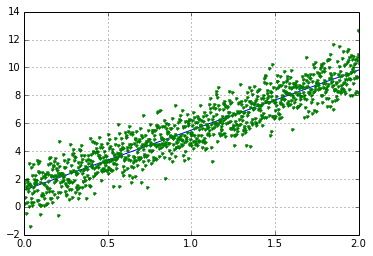

In [8]:
a,b = equation(data_x,data_y)
y = [(a*xx)+b for xx in data_x]
plt.plot(data_x,y)
plt.plot(data_x,data_y,'.')
plt.grid()

9) What is your prediction for the value of `y` when `x`=3.0?

In [29]:
print "y = " + str((a*3.0)+b)

y = 14.1199722834


###Generalization

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

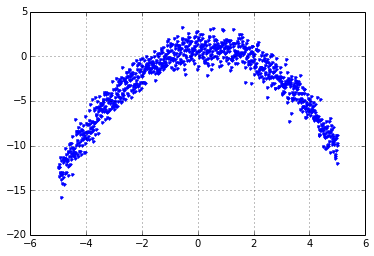

In [12]:
data_x,data_y = np.loadtxt('parabola.txt')
plt.plot(data_x,data_y,'.')
plt.grid()

2) What is the general form for parabola?

In [34]:
print "y = a(x^2) + bx + c"

y = a(x^2) + bx + c


3) What is the difference between a "good line" and a "bad line"?

In [33]:
print "A good line has the least distance from all the points, as compared to a bad line."

A good line has the least distance from all the points, as compared to a bad line.


4) What are we trying to minimize in order to find the best parabola?

In [35]:
print "We are trying to minimize X^2"
print """
Find a,b,c using equations:
a = Cov[x,y]/Var[x]
b = E[y]-aE[x]

Cov[x,y] = E[x.y]-E[x].E[y]
Var[x] = E[x^2]-E[x]^2
E[x] = sum(x)/n

Using this we get an equation for line y=a(x^2)+bx+c.
"""

We are trying to minimize X^2

Find a,b,c using equations:
a = Cov[x,y]/Var[x]
b = E[y]-aE[x]

Cov[x,y] = E[x.y]-E[x].E[y]
Var[x] = E[x^2]-E[x]^2
E[x] = sum(x)/n

Using this we get an equation for line y=a(x^2)+bx+c.



5) Find the best fitted parabola and plot to verify.

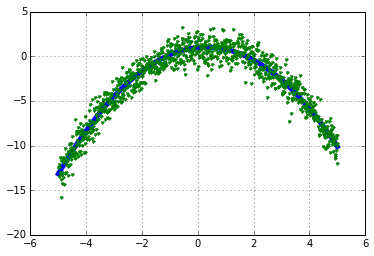

In [13]:
def e(x):
    return np.sum(x)/len(x)

A = [[e(data_x**4),e(data_x**3),e(data_x**2)],
     [e(data_x**3),e(data_x**2),e(data_x)],
     [e(data_x**2),e(data_x),1.0]]

C = [e((data_x**2)*data_y),e(data_x*data_y),e(data_y)]

a,b,c = np.linalg.solve(A,C)

y = [(a*(xx**2))+(b*xx)+c for xx in data_x]
plt.plot(data_x,y,lw=5)
plt.plot(data_x,data_y,'.')
plt.grid()

###Extra

Find something interesting from http://www.stat.ufl.edu/~winner/datasets.html and make some prediction.